# Project 1: Recreate - Remix
Comment: I am 75% through my recreate part, I still need to fix my y axis and the labels for each bar. 
I have an idea about my remix and once I am done with recreate, I am hoping that remix won't take me too long. 


## Part 1: Recreating Figure 
- Comparison of SDEs in comparison to other roles. 
- In 2022, Software developers earned an average of $141,138, $76,455 more than the average national salary of $64,683


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [95]:
# Load the dataset
file = "Yearly Wage Ranking.csv"
df = pd.read_csv(file)

In [96]:
df.head()

,ID Detailed Occupation,Detailed Occupation,ID Year,Year,ID Workforce Status,Workforce Status,Average Wage,Average Wage Appx MOE,Slug Detailed Occupation,Ranking,Shape,Type,Type ID
0,291240,Surgeons,2022,2022,True,True,381852.622484,23557.983973,surgeons,1,Bar,Top,1
1,291210,Physicians,2022,2022,True,True,0.000000,5147.691377,physicians,2,Bar,NaN,99
2,193011,Economists,2022,2022,True,True,153241.403730,17087.646490,economists,15,Bar,Neighbors,2
3,419031,Sales engineers,2022,2022,True,True,148880.532634,11981.863784,sales-engineers,16,Bar,Neighbors,2
4,113021,Computer & information systems managers,2022,2022,True,True,143483.983798,3051.490693,computer-information-systems-managers,17,Bar,Neighbors,2


In [64]:
# Filter the data for the top and bottom ranked occupations
top_bottom_df = df[df['Ranking'].isin([1, 2, 15, 16, 17, 18, 19, 20, 21, 528, 529])]

What attributes I could not cover here? 

/var/folders/sh/cb18dbvn3v9b80sk1g_qrcrw0000gn/T/ipykernel_5298/514942586.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


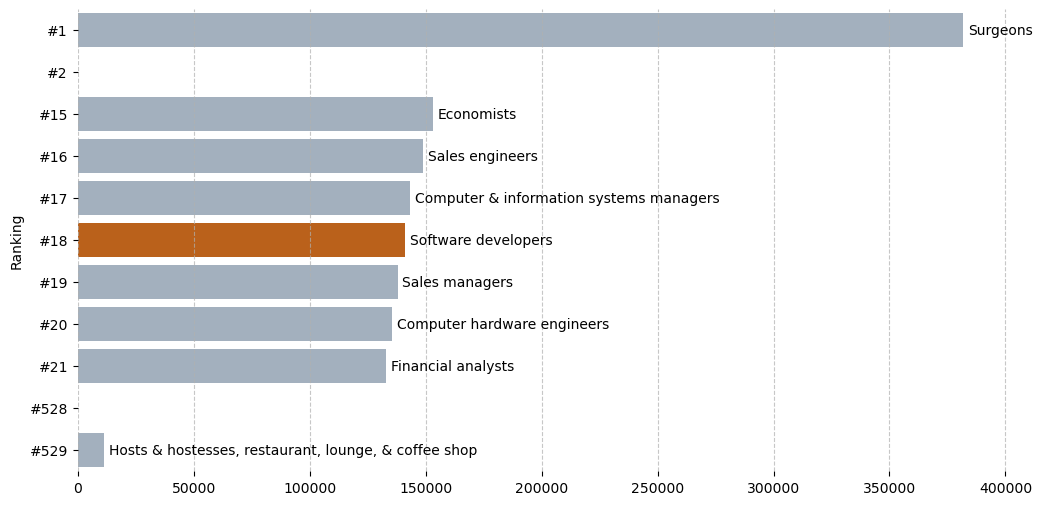

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file = "Yearly Wage Ranking.csv"
df = pd.read_csv(file)

# Filter the data for the top and bottom ranked occupations
top_bottom_df = df[df['Ranking'].isin([1, 2, 15, 16, 17, 18, 19, 20, 21, 528, 529])]
top_bottom_df['Highlight'] = top_bottom_df['Detailed Occupation'] == "Software developers"

# Sort so #1 is at the top
top_bottom_df = top_bottom_df.sort_values('Ranking', ascending=True)

# Convert numeric rank to strings like "#1", "#2", etc.
top_bottom_df['Ranking_str'] = '#' + top_bottom_df['Ranking'].astype(str)

# Create a color list so that "Software developers" is highlighted
colors = ['#d55e00' if h else '#9eb0c3' for h in top_bottom_df['Highlight']]

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_bottom_df,
    x='Average Wage',
    y='Ranking_str',  # use the rank string as y-axis
    palette=colors,
)

# Remove x-label or rename as you wish
plt.xlabel("")
plt.ylabel("Ranking")

# List of occupations we want to skip labeling
exclude_labels = ["Physicians", "Ushers, lobby attendants, & ticket takers"]

# Add occupation names to the right of each bar, except for the ones we want to skip
for patch, occupation in zip(ax.patches, top_bottom_df['Detailed Occupation']):
    if occupation in exclude_labels:
        continue
    bar_width = patch.get_width()
    bar_y = patch.get_y()
    bar_height = patch.get_height()
    
    # Vertical center of the bar
    y_center = bar_y + bar_height / 2
    
    # Add text a bit to the right of the bar
    ax.text(bar_width + 2000, y_center, occupation, va='center', ha='left')

# Remove the spines/frame
sns.despine(left=True, bottom=True)

# Optionally keep the dashed grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()



## Part 2: Remixing Figure 
- Comparison of SDEs in comparison to other roles. 
- In 2022, Software developers earned an average of $141,138, $76,455 more than the average national salary of $64,683

HOW? 

In the updated version, I wanted to make the comparison of occupations a bit more intuitive and help people see the bigger picture. Instead of just listing jobs by their rank, I decided to show the percentage difference between each occupation’s wage and the overall median wage. This way, it is easier for viewers to spot which roles are doing better or worse than average. I also grouped similar jobs by industry, and gave each industry a consistent color, so that people can instantly compare how, for example, tech jobs stack up against finance jobs or healthcare jobs. This approach helps viewers see not just the wages themselves but how they relate to each other and gives a clearer sense of wage patterns across different types of jobs.


/var/folders/sh/cb18dbvn3v9b80sk1g_qrcrw0000gn/T/ipykernel_5298/4060477069.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


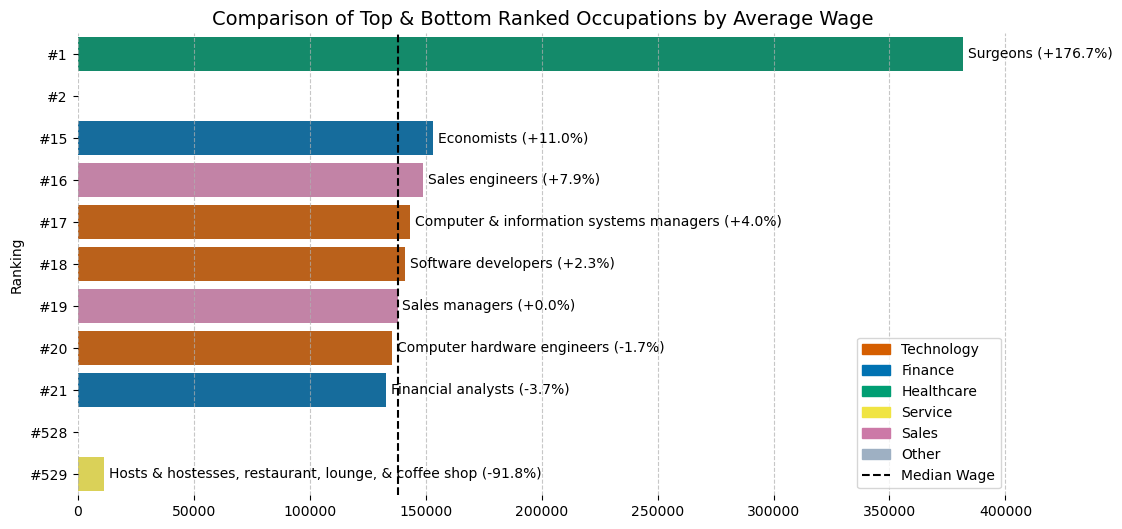

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and clean column names
file = "Yearly Wage Ranking.csv"
df = pd.read_csv(file)
df.columns = df.columns.str.replace(' ', '_')

# Filter the data for the top and bottom ranked occupations
top_bottom_df = df[df['Ranking'].isin([1, 2, 15, 16, 17, 18, 19, 20, 21, 528, 529])].copy()

# Map each occupation to an industry. Extend this dictionary as needed.
industry_mapping = {
    "Surgeons": "Healthcare",
    "Physicians": "Healthcare",
    "Economists": "Finance",
    "Sales engineers": "Sales",
    "Computer & information systems managers": "Technology",
    "Software developers": "Technology",
    "Sales managers": "Sales",
    "Computer hardware engineers": "Technology",
    "Financial analysts": "Finance",
    "Ushers, lobby attendants, & ticket takers": "Service",
    "Hosts & hostesses, restaurant, lounge, & coffee shop": "Service"
}

# For occupations not in the mapping, assign "Other"
top_bottom_df['Industry'] = top_bottom_df['Detailed_Occupation'].map(industry_mapping).fillna("Other")

# Sort so that #1 is at the top
top_bottom_df = top_bottom_df.sort_values('Ranking', ascending=True)

# Convert numeric rank to strings like "#1", "#2", etc.
top_bottom_df['Ranking_str'] = '#' + top_bottom_df['Ranking'].astype(str)

# Define industry colors
industry_colors = {
    "Technology": "#d55e00",  # reddish
    "Finance": "#0072B2",     # blue
    "Healthcare": "#009E73",  # green
    "Service": "#F0E442",     # yellow
    "Sales": "#CC79A7",       # pink
    "Other": "#9eb0c3"        # grey
}

# Create a list of colors for each row based on its industry
colors = top_bottom_df['Industry'].map(industry_colors).tolist()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_bottom_df,
    x='Average_Wage',
    y='Ranking_str',  # rankings on the y-axis
    palette=colors
)

# Add a title
plt.title("Comparison of Top & Bottom Ranked Occupations by Average Wage", fontsize=14)

plt.xlabel("")
plt.ylabel("Ranking")

# Compute the median wage and add a vertical dashed line as a benchmark
median_wage = top_bottom_df['Average_Wage'].median()
ax.axvline(median_wage, color='black', linestyle='--', label='Median Wage')

# List of occupations to skip labeling
exclude_labels = ["Physicians", "Ushers, lobby attendants, & ticket takers"]

# Annotate each bar with the occupation name and its percentage difference from the median wage
for patch, row in zip(ax.patches, top_bottom_df.itertuples()):
    pct_diff = ((row.Average_Wage - median_wage) / median_wage) * 100
    pct_text = f" ({pct_diff:+.1f}%)"
    
    if row.Detailed_Occupation in exclude_labels:
        continue  # Skip annotation for these occupations
    
    annotation = row.Detailed_Occupation + pct_text
    bar_width = patch.get_width()
    bar_y = patch.get_y()
    bar_height = patch.get_height()
    y_center = bar_y + bar_height / 2
    
    # Place the annotation text slightly to the right of the bar
    ax.text(bar_width + 2000, y_center, annotation, va='center', ha='left')

# Remove extra spines/frame for a minimal look and add a light dashed grid along the x-axis
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()  # Display legend for the median wage line

# Create legend handles for each industry color
legend_handles = [mpatches.Patch(color=industry_colors[industry], label=industry) for industry in industry_colors]

# Add the legend to the bottom right of the plot
ax.legend(handles=legend_handles, loc='lower right')

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Create legend handles for each industry
legend_handles = [mpatches.Patch(color=industry_colors[industry], label=industry) for industry in industry_colors]

# Create a legend handle for the median wage line
median_handle = Line2D([0], [0], color='black', linestyle='--', label='Median Wage')

# Combine both handles
all_handles = legend_handles + [median_handle]

# Add the combined legend to the bottom right of the plot
ax.legend(handles=all_handles, loc='lower right')

plt.show()
